Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import seaborn as sn

In [2]:
count = 0
images = []
label = []
path = '../../archive/Train'
classes_list = os.listdir(path)
print("Total Classes:",len(classes_list))
noOfClasses=len(classes_list)
print("Importing Classes.....")
for x in range (0,len(classes_list)):
    imglist = os.listdir(path+"/"+str(count))
    for y in imglist:
        img = cv2.imread(path+"/"+str(count)+"/"+y)
        img =cv2.resize(img,(32,32))
        images.append(img)
        label.append(count)
    print(count, end =" ")
    count +=1
print(" ")

Total Classes: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [3]:
images = np.array(images)
classNo = np.array(label)
data=np.array(images)
data= np.array(data).reshape(-1, 32, 32, 3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2)
Y_tests=y_test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2) 

print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(25280, 32, 32, 3) (25280,)
Validation(6321, 32, 32, 3) (6321,)
Test(7901, 32, 32, 3) (7901,)


In [5]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img) 
    img = equalize(img)  
    img = img / 255 # image normalization 
    return img


X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
### reshape data into channel 1
X_train=X_train.reshape(-1,32,32,1)
X_validation=X_validation.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)

In [6]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,batch_size=20)
X_batch, y_batch = next(batches)

In [7]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [8]:
#CNN Model
def seq_Model():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(32, 32, 1),
                      activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = seq_Model()
print(model.summary())#####Print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

In [9]:
batch_size_val=30
steps_per_epoch_val=500
epochs_val=50
##Train the model##
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)


Epoch 1/50
500/500 [==============================] - 187s 367ms/step - loss: 2.8914 - accuracy: 0.2125 - val_loss: 1.1496 - val_accuracy: 0.6703
Epoch 2/50
500/500 [==============================] - 181s 362ms/step - loss: 1.5256 - accuracy: 0.5405 - val_loss: 0.4446 - val_accuracy: 0.8864
Epoch 3/50
500/500 [==============================] - 184s 368ms/step - loss: 1.0500 - accuracy: 0.6779 - val_loss: 0.2850 - val_accuracy: 0.9250
Epoch 4/50
500/500 [==============================] - 175s 349ms/step - loss: 0.8004 - accuracy: 0.7530 - val_loss: 0.2209 - val_accuracy: 0.9440
Epoch 5/50
500/500 [==============================] - 181s 362ms/step - loss: 0.6871 - accuracy: 0.7901 - val_loss: 0.1585 - val_accuracy: 0.9579
Epoch 6/50
500/500 [==============================] - 181s 362ms/step - loss: 0.6029 - accuracy: 0.8139 - val_loss: 0.1520 - val_accuracy: 0.9541
Epoch 7/50
500/500 [==============================] - 181s 361ms/step - loss: 0.5215 - accuracy: 0.8375 - val_loss: 0.1005 -

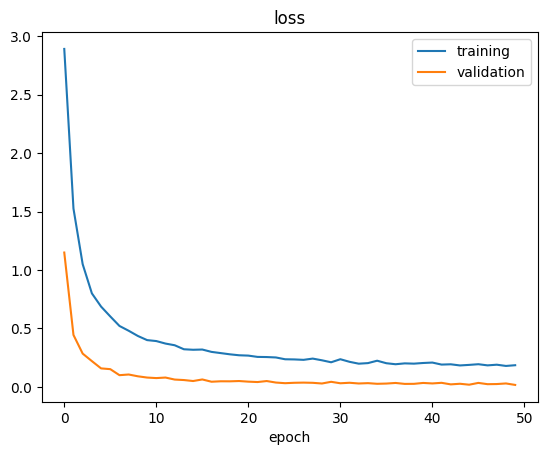

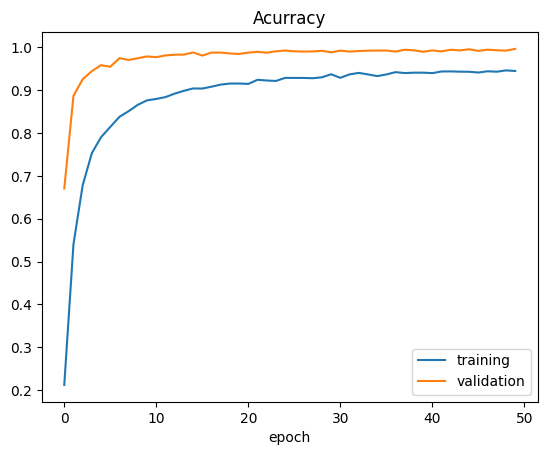

In [10]:
##Plot Graph##
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [11]:
#model testing
score =model.evaluate(X_test,y_test,verbose=0)       
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.01756088249385357
Test Accuracy: 0.9960764646530151


In [12]:
#save model
model.save('traffic_sign_model.h5')

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
threshold = 0.75  # THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
model = keras.models.load_model('traffic_sign_model.h5') #load model

In [14]:
def preprocess_img(imgBGR, erode_dilate=True):  # pre-processing fro detect signs in  image.
    rows, cols, _ = imgBGR.shape
    imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
    Bmin = np.array([100, 43, 46])
    Bmax = np.array([124, 255, 255])
    img_Bbin = cv2.inRange(imgHSV, Bmin, Bmax)

    Rmin1 = np.array([0, 43, 46])
    Rmax1 = np.array([10, 255, 255])
    img_Rbin1 = cv2.inRange(imgHSV, Rmin1, Rmax1)

    Rmin2 = np.array([156, 43, 46])
    Rmax2 = np.array([180, 255, 255])
    img_Rbin2 = cv2.inRange(imgHSV, Rmin2, Rmax2)
    img_Rbin = np.maximum(img_Rbin1, img_Rbin2)
    img_bin = np.maximum(img_Bbin, img_Rbin)

    if erode_dilate is True:
        kernelErosion = np.ones((3, 3), np.uint8)
        kernelDilation = np.ones((3, 3), np.uint8)
        img_bin = cv2.erode(img_bin, kernelErosion, iterations=2)
        img_bin = cv2.dilate(img_bin, kernelDilation, iterations=2)

    return img_bin

In [15]:
def contour_detect(img_bin, min_area, max_area=-1, wh_ratio=2.0):
    rects = []
    contours, _ = cv2.findContours(img_bin.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    if len(contours) == 0:
        return rects

    max_area = img_bin.shape[0] * img_bin.shape[1] if max_area < 0 else max_area
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >= min_area and area <= max_area:
            x, y, w, h = cv2.boundingRect(contour)
            if 1.0 * w / h < wh_ratio and 1.0 * h / w < wh_ratio:
                rects.append([x, y, w, h])
    return rects

In [16]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img

In [17]:
def getCalssName(classNo):
    if classNo == 0:
        return 'Speed Limit 20 km/h'
    elif classNo == 1:
        return 'Speed Limit 30 km/h'
    elif classNo == 2:
        return 'Speed Limit 50 km/h'
    elif classNo == 3:
        return 'Speed Limit 60 km/h'
    elif classNo == 4:
        return 'Speed Limit 70 km/h'
    elif classNo == 5:
        return 'Speed Limit 80 km/h'
    elif classNo == 6:
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7:
        return 'Speed Limit 100 km/h'
    elif classNo == 8:
        return 'Speed Limit 120 km/h'
    elif classNo == 9:
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:
        return 'Right-of-way at the next intersection'
    elif classNo == 12:
        return 'Priority road'
    elif classNo == 13:
        return 'Yield'
    elif classNo == 14:
        return 'Stop'
    elif classNo == 15:
        return 'No vechiles'
    elif classNo == 16:
        return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve to the left'
    elif classNo == 20:
        return 'Dangerous curve to the right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25:
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27:
        return 'Pedestrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End of all speed and passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'Keep right'
    elif classNo == 39:
        return 'Keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    elif classNo == 42:
        return 'End of no passing by vechiles over 3.5 metric tons'

In [18]:
if __name__ == "__main__":
    video_path = '../files/20230713_115651.mp4'
    cap = cv2.VideoCapture(video_path)
    cols = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    rows = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    while (1):
        ret, img = cap.read()
        img_bin = preprocess_img(img, False)
        # img = cv2.resize(img, (640, 480))
        cv2.imshow("bin image", img_bin)
        min_area = img_bin.shape[0] * img.shape[1] / (25 * 25)
        rects = contour_detect(img_bin, min_area=min_area)   # get x,y,h and w.
        img_bbx = img.copy()
        for rect in rects:
            xc = int(rect[0] + rect[2] / 2)
            yc = int(rect[1] + rect[3] / 2)

            size = max(rect[2], rect[3])
            x1 = max(0, int(xc - size / 2))
            y1 = max(0, int(yc - size / 2))
            x2 = min(cols, int(xc + size / 2))
            y2 = min(rows, int(yc + size / 2))

            # rect[2] is width and rect[3] for height
            if rect[2] > 100 and rect[3] > 100:             #only detect those signs whose height and width >100
                cv2.rectangle(img_bbx, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 255), 2)
            crop_img = np.asarray(img[y1:y2, x1:x2])
            crop_img = cv2.resize(crop_img, (32, 32))
            crop_img = preprocessing(crop_img)
            cv2.imshow("afterprocessing", crop_img)
            crop_img = crop_img.reshape(1, 32, 32, 1)       # (1,32,32) after reshape it become (1,32,32,1)
            predictions = model.predict(crop_img)           # make predicion
            classIndex = np.argmax(predictions)
            probabilityValue = np.amax(predictions)
            if probabilityValue > threshold:
                #write class name on the output screen
                cv2.putText(img_bbx, str(classIndex) + " " + str(getCalssName(classIndex)), (rect[0], rect[1] - 10),
                            font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
                # write probability value on the output screen
                cv2.putText(img_bbx, str(round(probabilityValue * 100, 2)) + "%", (rect[0], rect[1] - 40), font, 0.75,
                            (0, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow("detect result", img_bbx)
        if cv2.waitKey(1) & 0xFF == ord('q'):           # q for quit 
            break
cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [19]:
import cv2
import tensorflow as tf

# Charger le modèle pré-entraîné
model = keras.models.load_model('traffic_sign_model.h5')

# Lire la vidéo
video_capture = cv2.VideoCapture('../files/video.mp4')

# Obtenir les dimensions de la vidéo
frame_width = int(video_capture.get(3))
frame_height = int(video_capture.get(4))

# Définir la taille de la nouvelle vidéo agrandie
new_width = frame_width
new_height = frame_height 

# Définir un dictionnaire pour les options d'interpolation
interpolation = cv2.INTER_LINEAR

while True:
    # Lire chaque image de la vidéo
    ret, frame = video_capture.read()

    if not ret:
        break
    resized_frame = cv2.resize(frame, (new_width, new_height), interpolation=interpolation)

    
    # Prétraitement de l'image (redimensionner et convertir en niveaux de gris)
    frame = cv2.resize(frame, (32, 32))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    normalized_frame = gray_frame / 255.0  # Normalisation des valeurs de pixels entre 0 et 1
    input_frame = normalized_frame.reshape(1, 32, 32, 1)  # Ajouter une dimension batch

    # Prétraitement de l'image (adapté selon votre modèle)
    # Vous devrez redimensionner, normaliser ou tout autre traitement nécessaire.

    # Faire passer l'image dans le modèle pour la détection
    predictions = model.predict(input_frame)

    # Post-traitement des prédictions (obtenir les boîtes englobantes)

    # Dessiner les boîtes englobantes sur l'image
    for box in predictions:
        
        x, y, w, h = box[0], box[1], box[2], box[3]
        x, y, w, h = int(x * new_width / frame_width), int(y * new_height / frame_height), int(w * new_width / frame_width), int(h * new_height / frame_height)
        cv2.rectangle(resized_frame, (x, y), (x + w, y + h), (255, 0, 0), 2)


    # Afficher la vidéo avec les boîtes englobantes
    cv2.imshow('Video', resized_frame)

    # Attendre une touche 'q' pour quitter la vidéo
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer les ressources
video_capture.release()
cv2.destroyAllWindows()